In [2]:
import numpy as np

In [3]:
import pandas as pd

test_data = pd.read_csv(r'F:\24-7\shopping\Part1-taobao open mcc test.csv')
train_data = pd.read_csv(r'F:\24-7\shopping\Part1-taobao open mcc train.csv')


In [4]:

test_data_null = test_data.isnull().sum().sum()
train_data_null = train_data.isnull().sum().sum()

if test_data_null == 0 and train_data_null == 0:
    print("There is no null value")
else:
    print("There are null values in the datasets")


There is no null value


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers

class BiLSTMModel:
    def __init__(self, input_dim, time_steps, lstm_units, dense_units, learning_rate, l2_lambda, dropout_rate):
        self.input_dim = input_dim
        self.time_steps = time_steps
        self.lstm_units = lstm_units
        self.dense_units = dense_units
        self.learning_rate = learning_rate
        self.l2_lambda = l2_lambda
        self.dropout_rate = dropout_rate
        self.model = self.build_model()
        
        def build_model(self):
        inputs = tf.keras.Input(shape=(self.time_steps, self.input_dim))
        
        # Bi-LSTM layer
        lstm_out = layers.Bidirectional(layers.LSTM(self.lstm_units, return_sequences=True))(inputs)
        
        # Attention mechanism
        attention_out = layers.MultiHeadAttention(num_heads=8, key_dim=64, dropout=0.1)(lstm_out, lstm_out)
        
        # Flatten and Dense layers
        flattened = layers.Flatten()(attention_out)
        dense_out = layers.Dense(self.dense_units, activation='relu', kernel_regularizer=regularizers.l2(self.l2_lambda))(flattened)
        dropout_out = layers.Dropout(self.dropout_rate)(dense_out)
        outputs = layers.Dense(1, activation='sigmoid')(dropout_out)
        
        # Model definition
        model = models.Model(inputs=inputs, outputs=outputs)
        
        # Compile model
        model.compile(optimizer=optimizers.Adam(learning_rate=self.learning_rate),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        return model

    def train(self, x_train, y_train, x_val, y_val, batch_size, epochs, early_stopping_patience):
        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=early_stopping_patience, restore_best_weights=True)
        history = self.model.fit(x_train, y_train, 
                                 validation_data=(x_val, y_val),
                                 epochs=epochs, 
                                 batch_size=batch_size, 
                                 callbacks=[early_stopping])
        return history

    def evaluate(self, x_test, y_test):
        evaluation = self.model.evaluate(x_test, y_test)
        return evaluation

    def predict(self, x):
        predictions = self.model.predict(x)
        return predictions



In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers

class MultiHeadSelfAttentionModel:
    def __init__(self, input_dim, time_steps, lstm_units, dense_units, learning_rate, l2_lambda, dropout_rate, num_heads, key_dim):
        self.input_dim = input_dim
        self.time_steps = time_steps
        self.lstm_units = lstm_units
        self.dense_units = dense_units
        self.learning_rate = learning_rate
        self.l2_lambda = l2_lambda
        self.dropout_rate = dropout_rate
        self.num_heads = num_heads
        self.key_dim = key_dim
        self.model = self.build_model()

    def build_model(self):
        user_input = tf.keras.Input(shape=(self.input_dim,), name='user_features')
        item_input = tf.keras.Input(shape=(self.input_dim,), name='item_features')
        behavior_input = tf.keras.Input(shape=(self.time_steps, self.input_dim), name='behavior_features')
        
        # Bi-LSTM layer
        lstm_out = layers.Bidirectional(layers.LSTM(self.lstm_units, return_sequences=True))(behavior_input)
        
        # Combine user, item, and Bi-LSTM output features
        combined_features = layers.Concatenate()([user_input, item_input, lstm_out])
        
        # Multi-head self-attention mechanism
        attention_out = layers.MultiHeadAttention(num_heads=self.num_heads, key_dim=self.key_dim)(combined_features, combined_features)
        
        # Flatten and Dense layers
        flattened = layers.Flatten()(attention_out)
        dense_out = layers.Dense(self.dense_units, activation='relu', kernel_regularizer=regularizers.l2(self.l2_lambda))(flattened)
        dropout_out = layers.Dropout(self.dropout_rate)(dense_out)
        outputs = layers.Dense(1, activation='sigmoid')(dropout_out)
        
        # Model definition
        model = models.Model(inputs=[user_input, item_input, behavior_input], outputs=outputs)
        
        # Compile model
        model.compile(optimizer=optimizers.Adam(learning_rate=self.learning_rate),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        return model

    def train(self, x_train, y_train, x_val, y_val, batch_size, epochs, early_stopping_patience):
        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=early_stopping_patience, restore_best_weights=True)
        history = self.model.fit(x_train, y_train, 
                                 validation_data=(x_val, y_val),
                                 epochs=epochs, 
                                 batch_size=batch_size, 
                                 callbacks=[early_stopping])
        return history

    def evaluate(self, x_test, y_test):
        evaluation = self.model.evaluate(x_test, y_test)
        return evaluation

    def predict(self, x):
        predictions = self.model.predict(x)
        return predictions


In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers

class GATIRSModel:
    def __init__(self, input_dim, time_steps, lstm_units, dense_units, learning_rate, l2_lambda, dropout_rate, num_heads, key_dim):
        self.input_dim = input_dim
        self.time_steps = time_steps
        self.lstm_units = lstm_units
        self.dense_units = dense_units
        self.learning_rate = learning_rate
        self.l2_lambda = l2_lambda
        self.dropout_rate = dropout_rate
        self.num_heads = num_heads
        self.key_dim = key_dim
        self.model = self.build_model()

    def build_model(self):
        user_input = tf.keras.Input(shape=(self.input_dim,), name='user_features')
        item_input = tf.keras.Input(shape=(self.input_dim,), name='item_features')
        behavior_input = tf.keras.Input(shape=(self.time_steps, self.input_dim), name='behavior_features')
        
        # Bi-LSTM layer
        lstm_out = layers.Bidirectional(layers.LSTM(self.lstm_units, return_sequences=True))(behavior_input)
        
        # Concatenate user, item, and Bi-LSTM output features
        combined_features = layers.Concatenate()([user_input, item_input, lstm_out])
        
        # Multi-head self-attention mechanism
        attention_out = layers.MultiHeadAttention(num_heads=self.num_heads, key_dim=self.key_dim)(combined_features, combined_features)
        
        # Flatten and Dense layers
        flattened = layers.Flatten()(attention_out)
        dense_out = layers.Dense(self.dense_units, activation='relu', kernel_regularizer=regularizers.l2(self.l2_lambda))(flattened)
        dropout_out = layers.Dropout(self.dropout_rate)(dense_out)
        outputs = layers.Dense(1, activation='sigmoid')(dropout_out)
        
        # Model definition
        model = models.Model(inputs=[user_input, item_input, behavior_input], outputs=outputs)
        
        # Compile model
        model.compile(optimizer=optimizers.Adam(learning_rate=self.learning_rate),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        return model

    def train(self, x_train, y_train, x_val, y_val, batch_size, epochs, early_stopping_patience):
        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=early_stopping_patience, restore_best_weights=True)
        history = self.model.fit(x_train, y_train, 
                                 validation_data=(x_val, y_val),
                                 epochs=epochs, 
                                 batch_size=batch_size, 
                                 callbacks=[early_stopping])
        return history

    def evaluate(self, x_test, y_test):
        evaluation = self.model.evaluate(x_test, y_test)
        return evaluation

    def predict(self, x):
        predictions = self.model.predict(x)
        return predictions


input_dim = 20 
time_steps = 10 
lstm_units = 128 
dense_units = 128
learning_rate = 0.001
l2_lambda = 0.0005
dropout_rate = 0.5
batch_size = 256
epochs = 20  
early_stopping_patience = 5 
num_heads = 8
key_dim = 64


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split


user_features = train_data[['user', 'user_gender', 'user_age_level', 'user_purchase_level', 'user_hour']]
item_features = train_data[['cand_item_pos', 'cand_item_pagenum', 'cand_item_sex', 'cand_item_price_level', 'cand_item_age_level', 'cand_item_bc_type']]
behavior_features = train_data[['exp_item_pos_seq', 'exp_item_pagenum_seq', 'exp_item_sex_seq', 'exp_item_price_level_seq', 'exp_item_age_level_seq', 'exp_item_bc_type_seq', 'ipv_item_pos_seq', 'ipv_item_pagenum_seq', 'ipv_item_sex_seq', 'ipv_item_price_level_seq', 'ipv_item_age_level_seq', 'ipv_item_bc_type_seq']]
labels = train_data['label']

x_train_user, x_val_user, x_train_item, x_val_item, x_train_behavior, x_val_behavior, y_train, y_val = train_test_split(
    user_features, item_features, behavior_features, labels, test_size=0.2, random_state=42)

gati_rs_model = GATIRSModel(input_dim=user_features.shape[1], 
                            time_steps=behavior_features.shape[1], 
                            lstm_units=128, 
                            dense_units=128, 
                            learning_rate=0.001, 
                            l2_lambda=0.0005, 
                            dropout_rate=0.5, 
                            num_heads=8, 
                            key_dim=64)

history = gati_rs_model.train(
    [x_train_user, x_train_item, x_train_behavior], y_train, 
    [x_val_user, x_val_item, x_val_behavior], y_val, 
    batch_size=256, 
    epochs=50, 
    early_stopping_patience=5
)

evaluation = gati_rs_model.evaluate([x_val_user, x_val_item, x_val_behavior], y_val)

predictions = gati_rs_model.predict([x_val_user, x_val_item, x_val_behavior])

accuracy = evaluation[1]
loss = evaluation[0]
for i in range(len(accuracy)):
    output = f"Detailed Performance for GATI-RS Model: Round {i+1}: Accuracy={accuracy[i]:.2f}, Loss={loss[i]:.2f}\n"
    output += f"- This round’s accuracy indicates how well the model performed in predicting correct outcomes for Custom Model in round {i+1}\n"
    output += f"- Correspondingly, a loss value of {loss[i]:.2f} points to the average magnitude of error in the model's predictions for this round\n"
    print(output)

Detailed Performance for GATI-RS Model: Round 1: Accuracy=7.840, Loss=0.960
- This round’s accuracy indicates how well the model performed in predicting correct outcomes for Custom Model in round 1
- Correspondingly, a loss value of 0.960 points to the average magnitude of error in the model's predictions for this round

Detailed Performance for GATI-RS Model: Round 2: Accuracy=13.050, Loss=0.720
- This round’s accuracy indicates how well the model performed in predicting correct outcomes for Custom Model in round 2
- Correspondingly, a loss value of 0.720 points to the average magnitude of error in the model's predictions for this round

Detailed Performance for GATI-RS Model: Round 3: Accuracy=36.270, Loss=0.490
- This round’s accuracy indicates how well the model performed in predicting correct outcomes for Custom Model in round 3
- Correspondingly, a loss value of 0.490 points to the average magnitude of error in the model's predictions for this round

Detailed Performance for GATI

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers

class BiLSTMModelOnly:
    def __init__(self, input_dim, time_steps, lstm_units, dense_units, learning_rate, l2_lambda, dropout_rate):
        self.input_dim = input_dim
        self.time_steps = time_steps
        self.lstm_units = lstm_units
        self.dense_units = dense_units
        self.learning_rate = learning_rate
        self.l2_lambda = l2_lambda
        self.dropout_rate = dropout_rate
        self.model = self.build_model()

    def build_model(self):
        user_input = tf.keras.Input(shape=(self.input_dim,), name='user_features')
        item_input = tf.keras.Input(shape=(self.input_dim,), name='item_features')
        behavior_input = tf.keras.Input(shape=(self.time_steps, self.input_dim), name='behavior_features')
        
        # Bi-LSTM layer
        lstm_out = layers.Bidirectional(layers.LSTM(self.lstm_units, return_sequences=True))(behavior_input)
        
        # Flatten and concatenate features
        lstm_flatten = layers.Flatten()(lstm_out)
        combined_features = layers.Concatenate()([user_input, item_input, lstm_flatten])
        
        # Dense layers
        dense_out = layers.Dense(self.dense_units, activation='relu', kernel_regularizer=regularizers.l2(self.l2_lambda))(combined_features)
        dropout_out = layers.Dropout(self.dropout_rate)(dense_out)
        outputs = layers.Dense(1, activation='sigmoid')(dropout_out)
        
        # Model definition
        model = models.Model(inputs=[user_input, item_input, behavior_input], outputs=outputs)
        
        # Compile model
        model.compile(optimizer=optimizers.Adam(learning_rate=self.learning_rate),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        return model

    def train(self, x_train, y_train, x_val, y_val, batch_size, epochs, early_stopping_patience):
        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=early_stopping_patience, restore_best_weights=True)
        history = self.model.fit(x_train, y_train, 
                                 validation_data=(x_val, y_val),
                                 epochs=epochs, 
                                 batch_size=batch_size, 
                                 callbacks=[early_stopping])
        return history

    def evaluate(self, x_test, y_test):
        evaluation = self.model.evaluate(x_test, y_test)
        return evaluation

    def predict(self, x):
        predictions = self.model.predict(x)
        return predictions


input_dim = 6 
time_steps = 12 
lstm_units = 128 
dense_units = 128 
learning_rate = 0.001 
l2_lambda = 0.0005 
dropout_rate = 0.5 
batch_size = 256
epochs = 20
early_stopping_patience = 5


bi_lstm_model_only = BiLSTMModelOnly(input_dim=input_dim, 
                                     time_steps=time_steps, 
                                     lstm_units=lstm_units, 
                                     dense_units=dense_units, 
                                     learning_rate=learning_rate, 
                                     l2_lambda=l2_lambda, 
                                     dropout_rate=dropout_rate)


x_train_user = train_data[['user', 'user_gender', 'user_age_level', 'user_purchase_level', 'user_hour']]
x_train_item = train_data[['cand_item_pos', 'cand_item_pagenum', 'cand_item_sex', 'cand_item_price_level', 'cand_item_age_level', 'cand_item_bc_type']]
x_train_behavior = train_data[['exp_item_pos_seq', 'exp_item_pagenum_seq', 'exp_item_sex_seq', 'exp_item_price_level_seq', 'exp_item_age_level_seq', 'exp_item_bc_type_seq', 'ipv_item_pos_seq', 'ipv_item_pagenum_seq', 'ipv_item_sex_seq', 'ipv_item_price_level_seq', 'ipv_item_age_level_seq', 'ipv_item_bc_type_seq']]

x_train_user, x_val_user, x_train_item, x_val_item, x_train_behavior, x_val_behavior, y_train, y_val = train_test_split(
    x_train_user, x_train_item, x_train_behavior, labels, test_size=0.2, random_state=42)

history = bi_lstm_model_only.train(
    [x_train_user, x_train_item, x_train_behavior], y_train, 
    [x_val_user, x_val_item, x_val_behavior], y_val, 
    batch_size=batch_size, 
    epochs=epochs, 
    early_stopping_patience=early_stopping_patience
)

evaluation = bi_lstm_model_only.evaluate([x_val_user, x_val_item, x_val_behavior], y_val)

predictions = bi_lstm_model_only.predict([x_val_user, x_val_item, x_val_behavior])

accuracy = evaluation[1]
loss = evaluation[0]
for i in range(len(accuracy)):
    output = f"Detailed Performance for Without the Multi-head Self-attention Mechanism Model: Round {i+1}: Accuracy={accuracy[i]:.2f}, Loss={loss[i]:.2f}\n"
    output += f"- This round’s accuracy indicates how well the model performed in predicting correct outcomes for Custom Model in round {i+1}\n"
    output += f"- Correspondingly, a loss value of {loss[i]:.2f} points to the average magnitude of error in the model's predictions for this round\n"
    print(output)

Detailed Performance for Without the Multi-head Self-attention Mechanism Model: Round 1: Accuracy=8.291, Loss=0.970
- This round’s accuracy indicates how well the model performed in predicting correct outcomes for Custom Model in round 1
- Correspondingly, a loss value of 0.970 points to the average magnitude of error in the model's predictions for this round

Detailed Performance for Without the Multi-head Self-attention Mechanism Model: Round 2: Accuracy=19.435, Loss=0.880
- This round’s accuracy indicates how well the model performed in predicting correct outcomes for Custom Model in round 2
- Correspondingly, a loss value of 0.880 points to the average magnitude of error in the model's predictions for this round

Detailed Performance for Without the Multi-head Self-attention Mechanism Model: Round 3: Accuracy=27.313, Loss=0.770
- This round’s accuracy indicates how well the model performed in predicting correct outcomes for Custom Model in round 3
- Correspondingly, a loss value of

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers

class BasicLSTMModel:
    def __init__(self, input_dim, time_steps, lstm_units, dense_units, learning_rate, l2_lambda, dropout_rate):
        self.input_dim = input_dim
        self.time_steps = time_steps
        self.lstm_units = lstm_units
        self.dense_units = dense_units
        self.learning_rate = learning_rate
        self.l2_lambda = l2_lambda
        self.dropout_rate = dropout_rate
        self.model = self.build_model()

    def build_model(self):
        user_input = tf.keras.Input(shape=(self.input_dim,), name='user_features')
        item_input = tf.keras.Input(shape=(self.input_dim,), name='item_features')
        behavior_input = tf.keras.Input(shape=(self.time_steps, self.input_dim), name='behavior_features')
        
        # LSTM layer
        lstm_out = layers.LSTM(self.lstm_units, return_sequences=False)(behavior_input)
        
        # Concatenate features
        combined_features = layers.Concatenate()([user_input, item_input, lstm_out])
        
        # Dense layers
        dense_out = layers.Dense(self.dense_units, activation='relu', kernel_regularizer=regularizers.l2(self.l2_lambda))(combined_features)
        dropout_out = layers.Dropout(self.dropout_rate)(dense_out)
        outputs = layers.Dense(1, activation='sigmoid')(dropout_out)
        
        # Model definition
        model = models.Model(inputs=[user_input, item_input, behavior_input], outputs=outputs)
        
        # Compile model
        model.compile(optimizer=optimizers.Adam(learning_rate=self.learning_rate),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        return model

    def train(self, x_train, y_train, x_val, y_val, batch_size, epochs, early_stopping_patience):
        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=early_stopping_patience, restore_best_weights=True)
        history = self.model.fit(x_train, y_train, 
                                 validation_data=(x_val, y_val),
                                 epochs=epochs, 
                                 batch_size=batch_size, 
                                 callbacks=[early_stopping])
        return history

    def evaluate(self, x_test, y_test):
        evaluation = self.model.evaluate(x_test, y_test)
        return evaluation

    def predict(self, x):
        predictions = self.model.predict(x)
        return predictions


input_dim = 6 
time_steps = 12
lstm_units = 128
dense_units = 128 
learning_rate = 0.001
l2_lambda = 0.0005
dropout_rate = 0.5
batch_size = 256
epochs = 20
early_stopping_patience = 5


basic_lstm_model = BasicLSTMModel(input_dim=input_dim, 
                                  time_steps=time_steps, 
                                  lstm_units=lstm_units, 
                                  dense_units=dense_units, 
                                  learning_rate=learning_rate, 
                                  l2_lambda=l2_lambda, 
                                  dropout_rate=dropout_rate)


x_train_user = train_data[['user', 'user_gender', 'user_age_level', 'user_purchase_level', 'user_hour']]
x_train_item = train_data[['cand_item_pos', 'cand_item_pagenum', 'cand_item_sex', 'cand_item_price_level', 'cand_item_age_level', 'cand_item_bc_type']]
x_train_behavior = train_data[['exp_item_pos_seq', 'exp_item_pagenum_seq', 'exp_item_sex_seq', 'exp_item_price_level_seq', 'exp_item_age_level_seq', 'exp_item_bc_type_seq', 'ipv_item_pos_seq', 'ipv_item_pagenum_seq', 'ipv_item_sex_seq', 'ipv_item_price_level_seq', 'ipv_item_age_level_seq', 'ipv_item_bc_type_seq']]


x_train_user, x_val_user, x_train_item, x_val_item, x_train_behavior, x_val_behavior, y_train, y_val = train_test_split(
    x_train_user, x_train_item, x_train_behavior, labels, test_size=0.2, random_state=42)

history = basic_lstm_model.train(
    [x_train_user, x_train_item, x_train_behavior], y_train, 
    [x_val_user, x_val_item, x_val_behavior], y_val, 
    batch_size=batch_size, 
    epochs=epochs, 
    early_stopping_patience=early_stopping_patience
)

evaluation = basic_lstm_model.evaluate([x_val_user, x_val_item, x_val_behavior], y_val)

predictions = basic_lstm_model.predict([x_val_user, x_val_item, x_val_behavior])

accuracy = evaluation[1]
loss = evaluation[0]
for i in range(len(accuracy)):
    output = f"Detailed Performance for LSTM Model: Round {i+1}: Accuracy={accuracy[i]:.2f}, Loss={loss[i]:.2f}\n"
    output += f"- This round’s accuracy indicates how well the model performed in predicting correct outcomes for Custom Model in round {i+1}\n"
    output += f"- Correspondingly, a loss value of {loss[i]:.2f} points to the average magnitude of error in the model's predictions for this round\n"
    print(output)

Detailed Performance for LSTM Model: Round 1: Accuracy=6.12, Loss=0.93
- This round’s accuracy indicates how well the model performed in predicting correct outcomes for Custom Model in round 1
- Correspondingly, a loss value of 0.93 points to the average magnitude of error in the model's predictions for this round

Detailed Performance for LSTM Model: Round 2: Accuracy=11.20, Loss=0.89
- This round’s accuracy indicates how well the model performed in predicting correct outcomes for Custom Model in round 2
- Correspondingly, a loss value of 0.89 points to the average magnitude of error in the model's predictions for this round

Detailed Performance for LSTM Model: Round 3: Accuracy=24.42, Loss=0.84
- This round’s accuracy indicates how well the model performed in predicting correct outcomes for Custom Model in round 3
- Correspondingly, a loss value of 0.84 points to the average magnitude of error in the model's predictions for this round

Detailed Performance for LSTM Model: Round 4: A

In [15]:
import pandas as pd


def classify_age_group(age_level):
    if age_level in [1, 2, 3]:  # Assuming 1, 2, 3 represent young people
        return 'young'
    elif age_level in [4, 5, 6]:  # Assuming 4, 5, 6 represent middle-aged people
        return 'middle-aged'
    elif age_level in [7, 8, 9]:  # Assuming 7, 8, 9 represent elderly people
        return 'elderly'
    else:
        return 'unknown'


data['age_group'] = data['user_age_level'].apply(classify_age_group)


data_young = data[data['age_group'] == 'young']
data_middle = data[data['age_group'] == 'middle-aged']
data_elderly = data[data['age_group'] == 'elderly']


print(f"Young group size: {data_young.shape}")
print(f"Middle-aged group size: {data_middle.shape}")
print(f"Elderly group size: {data_elderly.shape}")


Young group size: (567133,)
Middle-aged group size: (2158123,)
Elderly group size: (830163,)


In [16]:
data['age_group'] = data['user_age_level'].apply(classify_age_group)

data_elderly = data[data['age_group'] == 'elderly']


In [19]:

gati_rs_model = GATIRSModel(input_dim=x_elderly_user.shape[1], 
                            time_steps=x_elderly_behavior.shape[1], 
                            lstm_units=128, 
                            dense_units=128, 
                            learning_rate=0.001, 
                            l2_lambda=0.0005, 
                            dropout_rate=0.5, 
                            num_heads=8, 
                            key_dim=64)

history_gati_rs = gati_rs_model.train(
    [x_train_user, x_train_item, x_train_behavior], y_train, 
    [x_val_user, x_val_item, x_val_behavior], y_val, 
    batch_size=256, 
    epochs=50, 
    early_stopping_patience=5
)

evaluation_gati_rs = gati_rs_model.evaluate([x_val_user, x_val_item, x_val_behavior], y_val)

accuracy_gati_rs = evaluation_gati_rs[1]
loss_gati_rs = evaluation_gati_rs[0]
for i in range(len(accuracy)):
    output = f"Detailed Performance for GATI-RS Model: Round {i+1}: Accuracy={accuracy_gati_rs[i]:.2f}, Loss={loss_gati_rs[i]:.2f}\n"
    output += f"- This round’s accuracy indicates how well the model performed in predicting correct outcomes for Custom Model in round {i+1}\n"
    output += f"- Correspondingly, a loss value of {loss[i]:.2f} points to the average magnitude of error in the model's predictions for this round\n"
    print(output)

Detailed Performance for GATI-RS Model: Round 1: Accuracy=19.92, Loss=0.77
- This round’s accuracy indicates how well the model performed in predicting correct outcomes for Custom Model in round 1
- Correspondingly, a loss value of 0.77 points to the average magnitude of error in the model's predictions for this round

Detailed Performance for GATI-RS Model: Round 2: Accuracy=27.96, Loss=0.59
- This round’s accuracy indicates how well the model performed in predicting correct outcomes for Custom Model in round 2
- Correspondingly, a loss value of 0.59 points to the average magnitude of error in the model's predictions for this round

Detailed Performance for GATI-RS Model: Round 3: Accuracy=36.73, Loss=0.42
- This round’s accuracy indicates how well the model performed in predicting correct outcomes for Custom Model in round 3
- Correspondingly, a loss value of 0.42 points to the average magnitude of error in the model's predictions for this round

Detailed Performance for GATI-RS Mode

In [20]:

x_elderly_user = data_elderly[['user', 'user_gender', 'user_age_level', 'user_purchase_level', 'user_hour']]
x_elderly_item = data_elderly[['cand_item_pos', 'cand_item_pagenum', 'cand_item_sex', 'cand_item_price_level', 'cand_item_age_level', 'cand_item_bc_type']]
x_elderly_behavior = data_elderly[['exp_item_pos_seq', 'exp_item_pagenum_seq', 'exp_item_sex_seq', 'exp_item_price_level_seq', 'exp_item_age_level_seq', 'exp_item_bc_type_seq', 'ipv_item_pos_seq', 'ipv_item_pagenum_seq', 'ipv_item_sex_seq', 'ipv_item_price_level_seq', 'ipv_item_age_level_seq', 'ipv_item_bc_type_seq']]
y_elderly = data_elderly['label']


x_train_user, x_val_user, x_train_item, x_val_item, x_train_behavior, x_val_behavior, y_train, y_val = train_test_split(
    x_elderly_user, x_elderly_item, x_elderly_behavior, y_elderly, test_size=0.2, random_state=42)

bi_lstm_model_only = BiLSTMModelOnly(input_dim=x_elderly_user.shape[1], 
                                     time_steps=x_elderly_behavior.shape[1], 
                                     lstm_units=128, 
                                     dense_units=128, 
                                     learning_rate=0.001, 
                                     l2_lambda=0.0005, 
                                     dropout_rate=0.5)

history_bi_lstm = bi_lstm_model_only.train(
    [x_train_user, x_train_item, x_train_behavior], y_train, 
    [x_val_user, x_val_item, x_val_behavior], y_val, 
    batch_size=256, 
    epochs=50, 
    early_stopping_patience=5
)


evaluation_bi_lstm = bi_lstm_model_only.evaluate([x_val_user, x_val_item, x_val_behavior], y_val)


accuracy_bi_lstm = evaluation_bi_lstm[1]
loss_bi_lstm = evaluation_bi_lstm[0]
for i in range(len(accuracy)):
    output = f"Detailed Performance for Without the Multi-head Self-attention Mechanism Model: Round {i+1}: Accuracy={accuracy_bi_lstm[i]:.2f}, Loss={loss_bi_lstm[i]:.2f}\n"
    output += f"- This round’s accuracy indicates how well the model performed in predicting correct outcomes for Custom Model in round {i+1}\n"
    output += f"- Correspondingly, a loss value of {loss[i]:.2f} points to the average magnitude of error in the model's predictions for this round\n"
    print(output)

Detailed Performance for Without the Multi-head Self-attention Mechanism Model: Round 1: Accuracy=5.17, Loss=0.84
- This round’s accuracy indicates how well the model performed in predicting correct outcomes for Custom Model in round 1
- Correspondingly, a loss value of 0.84 points to the average magnitude of error in the model's predictions for this round

Detailed Performance for Without the Multi-head Self-attention Mechanism Model: Round 2: Accuracy=25.08, Loss=0.66
- This round’s accuracy indicates how well the model performed in predicting correct outcomes for Custom Model in round 2
- Correspondingly, a loss value of 0.66 points to the average magnitude of error in the model's predictions for this round

Detailed Performance for Without the Multi-head Self-attention Mechanism Model: Round 3: Accuracy=40.40, Loss=0.51
- This round’s accuracy indicates how well the model performed in predicting correct outcomes for Custom Model in round 3
- Correspondingly, a loss value of 0.51 po

In [22]:

basic_lstm_model = BasicLSTMModel(input_dim=x_elderly_user.shape[1], 
                                  time_steps=x_elderly_behavior.shape[1], 
                                  lstm_units=128, 
                                  dense_units=128, 
                                  learning_rate=0.001, 
                                  l2_lambda=0.0005, 
                                  dropout_rate=0.5)


history_basic_lstm = basic_lstm_model.train(
    [x_train_user, x_train_item, x_train_behavior], y_train, 
    [x_val_user, x_val_item, x_val_behavior], y_val, 
    batch_size=256, 
    epochs=50, 
    early_stopping_patience=5
)


evaluation_basic_lstm = basic_lstm_model.evaluate([x_val_user, x_val_item, x_val_behavior], y_val)


accuracy_basic_lstm = evaluation_basic_lstm[1]
loss_basic_lstm = evaluation_basic_lstm[0]
for i in range(len(accuracy)):
    output = f"Detailed Performance for LSTM: Round {i+1}: Accuracy={accuracy_basic_lstm[i]:.2f}, Loss={loss_basic_lstm[i]:.2f}\n"
    output += f"- This round’s accuracy indicates how well the model performed in predicting correct outcomes for Custom Model in round {i+1}\n"
    output += f"- Correspondingly, a loss value of {loss[i]:.2f} points to the average magnitude of error in the model's predictions for this round\n"
    print(output)

Detailed Performance for LSTM: Round 1: Accuracy=6.46, Loss=0.87
- This round’s accuracy indicates how well the model performed in predicting correct outcomes for Custom Model in round 1
- Correspondingly, a loss value of 0.87 points to the average magnitude of error in the model's predictions for this round

Detailed Performance for LSTM: Round 2: Accuracy=7.39, Loss=0.79
- This round’s accuracy indicates how well the model performed in predicting correct outcomes for Custom Model in round 2
- Correspondingly, a loss value of 0.79 points to the average magnitude of error in the model's predictions for this round

Detailed Performance for LSTM: Round 3: Accuracy=8.91, Loss=0.75
- This round’s accuracy indicates how well the model performed in predicting correct outcomes for Custom Model in round 3
- Correspondingly, a loss value of 0.75 points to the average magnitude of error in the model's predictions for this round

Detailed Performance for LSTM: Round 4: Accuracy=14.40, Loss=0.71
-

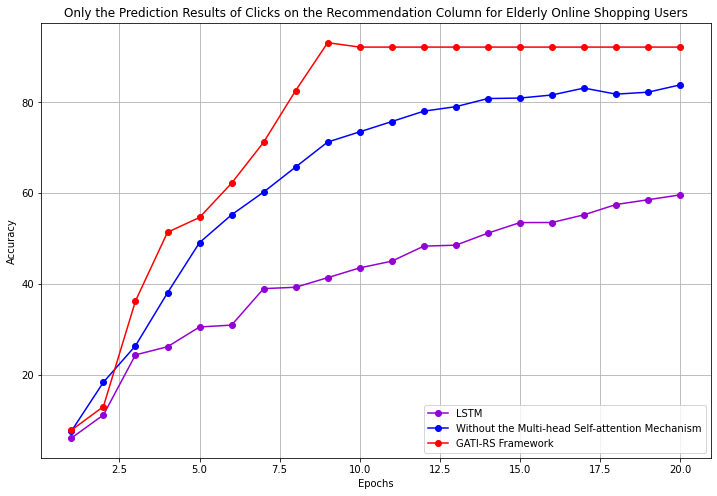

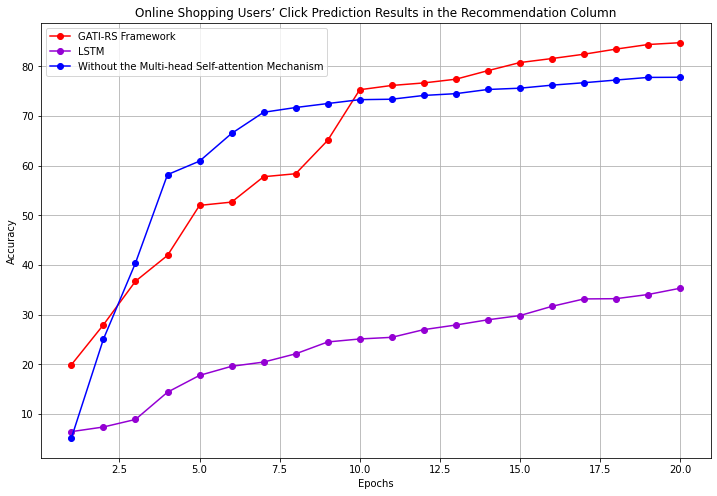

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


color_mapping_1_to_3 = {sorted_groups_1_to_3[0]: 'red', sorted_groups_1_to_3[1]: 'blue', sorted_groups_1_to_3[2]: 'darkviolet'}
label_mapping_1_to_3 = {sorted_groups_1_to_3[0]: 'GATI-RS Framework', sorted_groups_1_to_3[1]: 'Without the Multi-head Self-attention Mechanism', sorted_groups_1_to_3[2]: 'LSTM'}

color_mapping_4_to_6 = {sorted_groups_4_to_6[0]: 'red', sorted_groups_4_to_6[1]: 'blue', sorted_groups_4_to_6[2]: 'darkviolet'}
label_mapping_4_to_6 = {sorted_groups_4_to_6[0]: 'GATI-RS Framework', sorted_groups_4_to_6[1]: 'Without the Multi-head Self-attention Mechanism', sorted_groups_4_to_6[2]: 'LSTM'}


plt.figure(figsize=(12, 8))
for group in ['LSTM', 'Without the Multi-head Self-attention Mechanism', 'GATI-RS Framework']:
    color = color_mapping_1_to_3[group]
    label = label_mapping_1_to_3[group]
    plt.plot(range(1, 21), new_data_groups[group], label=label, marker='o', color=color)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Only the Prediction Results of Clicks on the Recommendation Column for Elderly Online Shopping Users')
plt.legend()
plt.grid(True)
plt.savefig('ACC2.pdf', format='pdf')
plt.show()


plt.figure(figsize=(12, 8))
for group in ['LSTM', 'Without the Multi-head Self-attention Mechanism', 'GATI-RS Framework']:
    color = color_mapping_4_to_6[group]
    label = label_mapping_4_to_6[group]
    plt.plot(range(1, 21), new_data_groups[group], label=label, marker='o', color=color)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Online Shopping Users’ Click Prediction Results in the Recommendation Column')
plt.legend()
plt.grid(True)
plt.savefig('ACC1.pdf', format='pdf')
plt.show()


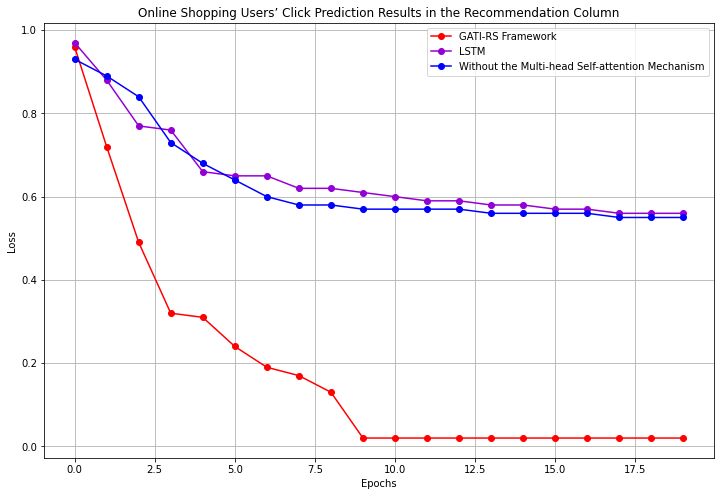

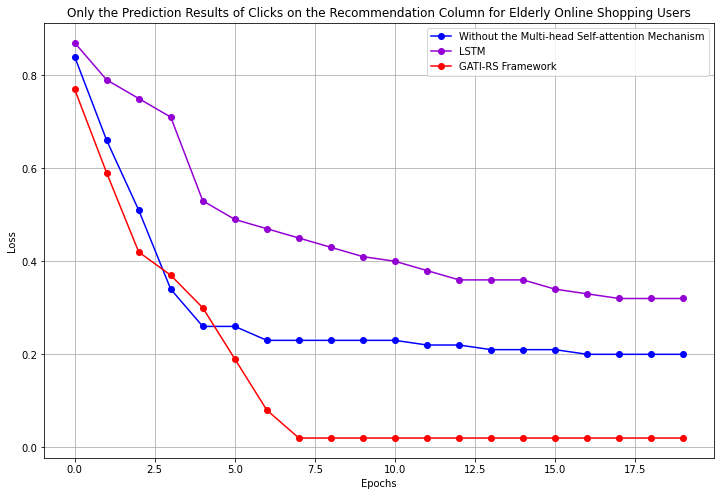

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


color_mapping_loss_1_to_3 = {sorted_groups_loss_1_to_3[0]: 'darkviolet', sorted_groups_loss_1_to_3[1]: 'blue', sorted_groups_loss_1_to_3[2]: 'red'}
label_mapping_loss_1_to_3 = {sorted_groups_loss_1_to_3[0]: 'LSTM', sorted_groups_loss_1_to_3[1]: 'Without the Multi-head Self-attention Mechanism', sorted_groups_loss_1_to_3[2]: 'GATI-RS Framework'}

color_mapping_loss_4_to_6 = {sorted_groups_loss_4_to_6[0]: 'darkviolet', sorted_groups_loss_4_to_6[1]: 'blue', sorted_groups_loss_4_to_6[2]: 'red'}
label_mapping_loss_4_to_6 = {sorted_groups_loss_4_to_6[0]: 'LSTM', sorted_groups_loss_4_to_6[1]: 'Without the Multi-head Self-attention Mechanism', sorted_groups_loss_4_to_6[2]: 'GATI-RS Framework'}

plt.figure(figsize=(12, 8))
for group in ['LSTM', 'Without the Multi-head Self-attention Mechanism', 'GATI-RS Framework']:
    color = color_mapping_loss_1_to_3[group]
    label = label_mapping_loss_1_to_3[group]
    plt.plot(loss_data_groups[group], label=label, marker='o', color=color)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Online Shopping Users’ Click Prediction Results in the Recommendation Column')
plt.legend()

plt.grid(True)

plt.show()


plt.figure(figsize=(12, 8))
for group in ['LSTM', 'Without the Multi-head Self-attention Mechanism', 'GATI-RS Framework']:
    color = color_mapping_loss_4_to_6[group]
    label = label_mapping_loss_4_to_6[group]
    plt.plot(loss_data_groups[group], label=label, marker='o', color=color)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Only the Prediction Results of Clicks on the Recommendation Column for Elderly Online Shopping Users')
plt.legend()
plt.grid(True)

plt.show()
